In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import pickle as pkl

In [13]:
font = {'size'   : 30}

plt.rc('font', **font)

In [3]:
base_folder = "Datatables/"

In [16]:
#Use this version if you pre-processed the datatables
def get_merged_dt_v2(cross, sdis, F, CR, popsize):
    return pd.read_csv(f"{base_folder}DEro{cross}_{sdis}_p{popsize}_F{F}CR{CR}_cosine.csv", index_col=0)

#Use this version otherwise
import glob
def get_merged_dt_v2(cross, sdis, F, CR, popsize):
    dt_large = pd.DataFrame()
    files = glob.glob(f"/mnt/e/Research/DE/CosineSimilarity-MoreData/CosineSimilarity-MoreData/7/DEro{cross}{sdis}p{popsize}D30*F{F}Cr{CR}.txt")
    if len(files) == 0:
        return dt_large
    for f in files:
        dt_temp = pd.read_csv(f, sep=' ', header=None, skiprows=1)
        dt_large = dt_large.append(dt_temp)
    dt_large['cross'] = cross
    dt_large['sdis'] = sdis
    dt_large['F'] = F
    dt_large['CR'] = CR
    dt_large['popsize'] = popsize
    dt_large.columns = ['cosine', 'applied', 'accept', 'cross', 'sdis', 'F', 'CR', 'popsize']
    return dt_large

In [5]:
def get_merged_dt_v3(sdis, F, CR, popsize):
    return pd.read_csv(f"{base_folder}DE_{sdis}_p{popsize}_F{F}CR{CR}_cosine_v3.csv", index_col=0)

In [6]:
def get_merged_dt_v4(sdis, F, CR, popsize):
    return pd.read_csv(f"{base_folder}DE_{sdis}_p{popsize}_F{F}CR{CR}_cosine_v4.csv", index_col=0)

In [7]:
def get_diversity_dt(sdis, F, CR, popsize):
    return pd.read_csv(f"{base_folder}DE_{sdis}_p{popsize}_F{F}CR{CR}_diversity.csv", index_col=0)

In [17]:
def get_diversity_dt(sdis, F, CR, popsize):
    dt_large = pd.DataFrame()
    files = glob.glob(f"/mnt/e/Research/DE/Div_cos_sim/CosineSimilarity/7/Diversity-DErob{sdis}p{popsize}D30f0*_F{F}Cr{CR}.txt")
    if len(files) == 0:
        return dt_large
    for f in files:
        dt_temp = pd.read_csv(f, sep=' ', header=None, skiprows=1)
        dt_large = dt_large.append(dt_temp)
    dt_large['sdis'] = sdis
    dt_large['F'] = F
    dt_large['CR'] = CR
    dt_large['popsize'] = popsize
    dt_large.columns = ['div0', 'div1', 'sdis', 'F', 'CR', 'popsize']
    return dt_large

In [10]:
sdiss = ['c', 'm', 's', 't', 'u', 'h']
sdiss_lables = ['COTN', 'mirror', 'saturate', 'torroidal', 'unif_resample', 'halfway']
sdis_label_dict = {k:v for k,v in zip(sdiss, sdiss_lables)}

In [ ]:
# Single figure showing histogram of CS for each combination
for cross in ['b','e']:
    for sdis in ['c', 'h', 'm', 's', 't', 'u']:
        for CR in ['005','0285','052','0755','099']:
            for F in ['005','0285','052','0755','099']:
                for popsize in [5,20, 100]:
# for sdis in ['c', 'm', 's', 't', 'u']:
                    dt_plot = get_merged_dt_v2(cross, sdis, F, CR, popsize)#dt_full[(dt_full['cross'] == cross) &(dt_full['popsize'] == popsize) & (dt_full['CR'] == CR) & (dt_full['sdis'] == sdis) & (dt_full['F'] == F)] 
                    if len(dt_plot)==0:
                        print(cross, sdis, CR, F, popsize)
                    else:
                        plt.figure(figsize=(16,10))
                        bins = np.arange(-1,1.05,0.05)
                        plt.hist(x=[dt_plot[(dt_plot['accept'] == 1) & (dt_plot['applied'] == 1)]['cosine'], dt_plot[(dt_plot['accept'] == 0) & (dt_plot['applied'] == 1)]['cosine']], bins=bins, stacked=False)
                        plt.yscale('log')
                        try:
                            plt.legend([f"accept = 1 ({len(dt_plot[(dt_plot['accept'] == 1) & (dt_plot['applied'])]['cosine'])/len(dt_plot[dt_plot['applied'] == 1]):.4f})", 
                                        f"accept = 0 ({len(dt_plot[(dt_plot['accept'] == 0) & (dt_plot['applied'])]['cosine'])/len(dt_plot[dt_plot['applied'] == 1]):.4f})"])
                        except:
                            print("a")
                        plt.savefig(f"Figures/DEro{cross}_{sdis}_p{popsize}_F{F}CR{CR}_cosine_histogram.png")
                        plt.close()

In [ ]:
#Same type of figure, but in matrix-form
def create_plot_matrix_F_CR(cross, sdis, popsize):
    fig, axes = plt.subplots(nrows=5, ncols=5, sharex='all', sharey='all')
    for idx_0, F in enumerate(['099','0755','052','0285','005']):
        for idx_1, CR in enumerate(['005','0285','052','0755','099']):
            dt_plot = get_merged_dt_v2(cross, sdis, F, CR, popsize)
            if len(dt_plot)==0:
                print(CR, F)
            else:
#                 plt.figure(figsize=(16,10))
                bins = np.arange(-1.0000000001,1.0500000001,0.05)
                axes[idx_0, idx_1].hist(x=dt_plot[(dt_plot['applied'] == 1)]['cosine'], bins=bins)
    #             axes[idx_0, idx_1].('log')
                axes[idx_0, idx_1].set_yscale('log')
                axes[idx_0, idx_1].set_ylim(1,1e8)
                ax2 = axes[idx_0, idx_1].twinx()
    #         sns.kdeplot(df['total_bill'], ax=ax2)
                ax2.hist(x=dt_plot[(dt_plot['applied'] == 1)]['cosine'], bins=bins, density = True, alpha=0.7, color='orange')
                frac = len(dt_plot[(dt_plot['applied'] == 1)]['cosine'])/len(dt_plot)
                axes[idx_0, idx_1].legend([f'Log-scaled (applied only, {frac})'], fontsize=8)
                if idx_1 != 4:
                    ax2.set_yticks([])
                if idx_0 == 4:
                    axes[idx_0, idx_1].set_xlabel(f'CR {CR}')
                    
        axes[idx_0, 0].set_ylabel(f'F: {F}')
    fig.set_figheight(20)
    fig.set_figwidth(20)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.03, wspace=0.03)
    fig.text(0.5, 0.01, 'Cosine Similarity', ha='center', va='center')
    fig.text(0.01, 0.5, 'Number of Occurences', ha='center', va='center', rotation='vertical')
    fig.text(0.99, 0.5, 'Density', ha='center', va='center', rotation='vertical')
    plt.savefig(f"Figures/Matrix_F_CR_{cross}_{sdis}_p{popsize}.pdf")


In [ ]:
#Same matrix-based figure, but including more information about number of mutations / corrections
def create_plot_matrix_F_CR_more(sdis, popsize, version = 'nr_mut', log_spaced = True):
    fig, axes = plt.subplots(nrows=5, ncols=5, sharex='all', sharey='all')

    for idx_0, F in enumerate(['099','0755','052','0285','005']):
        for idx_1, CR in enumerate(['0041','0081','0121','0161','0201']):
            dt = get_merged_dt_v3(sdis, F, CR, popsize)
            if len(dt)==0:
                print(CR, F)
            else:
                dt_applied = dt[dt['nr_exceed'] >= 1]
                dt_applied['nr_mut_not_exceed'] = dt['nr_mut'] - dt['nr_exceed']
#                 bins = np.arange(-1.0000000001,1.0500000001,0.05)
                bins = np.arange(-1.000000000,1.00000001,0.05)
                if version == 'nr_mut':
                    axes[idx_0, idx_1].hist(x=dt_applied['cosine'], density=True, bins=bins, alpha=0.5)
                    axes[idx_0, idx_1].hist(x=[dt_applied[(dt_applied['nr_mut'] == 1)]['cosine'], dt_applied[(dt_applied['nr_mut'] == 2)]['cosine'], 
                                dt_applied[(dt_applied['nr_mut'] == 3)]['cosine'], dt_applied[(dt_applied['nr_mut'] >= 4)]['cosine']], bins=bins, density = True)
                    
                    axes[idx_0, idx_1].legend([f"Total {len(dt_applied)/len(dt):.4f}",
                                f"1 mut {len(dt_applied[(dt_applied['nr_mut'] == 1)])/len(dt):.4f}", f"2 mut {len(dt_applied[(dt_applied['nr_mut'] == 2)])/len(dt):.4f}", 
                                f"3 mut {len(dt_applied[(dt_applied['nr_mut'] == 3)])/len(dt):.4f}", f"4+ mut {len(dt_applied[(dt_applied['nr_mut'] >= 4)])/len(dt):.4f}"], fontsize=10)
                elif version == 'nr_exceed':
                    axes[idx_0, idx_1].hist(x=dt_applied['cosine'], density=True, bins=bins, alpha=0.5)
                    axes[idx_0, idx_1].hist(x=[dt_applied[(dt_applied['nr_exceed'] == 1)]['cosine'], dt_applied[(dt_applied['nr_exceed'] == 2)]['cosine'], 
                                dt_applied[(dt_applied['nr_exceed'] == 3)]['cosine'], dt_applied[(dt_applied['nr_exceed'] >= 4)]['cosine']], bins=bins, density = True)

#                     axes[idx_0, idx_1].set_yscale('log')
                    axes[idx_0, idx_1].legend([f"Total {len(dt_applied)/len(dt):.4f}",
                                f"1 exceeded {len(dt_applied[(dt_applied['nr_exceed'] == 1)])/len(dt):.4f}", f"2 exceeded {len(dt_applied[(dt_applied['nr_exceed'] == 2)])/len(dt):.4f}", 
                                f"3 exceeded {len(dt_applied[(dt_applied['nr_exceed'] == 3)])/len(dt):.4f}", f"4+ exceeded {len(dt_applied[(dt_applied['nr_exceed'] >= 4)])/len(dt):.4f}"], fontsize=10)
                else:
                    axes[idx_0, idx_1].hist(x=dt_applied['cosine'], density=True, bins=bins, alpha=0.5)
                    axes[idx_0, idx_1].hist(x=[dt_applied[(dt_applied['nr_mut_not_exceed'] == 0)]['cosine'], dt_applied[(dt_applied['nr_mut_not_exceed'] == 1)]['cosine'], 
                                dt_applied[(dt_applied['nr_mut_not_exceed'] == 2)]['cosine'], dt_applied[(dt_applied['nr_mut_not_exceed'] >= 3)]['cosine']], bins=bins, density = True)

#                     axes[idx_0, idx_1].set_yscale('log')
                    axes[idx_0, idx_1].legend([f"Total {len(dt_applied)/len(dt):.4f}",
                                f"0 mut_not_exceed {len(dt_applied[(dt_applied['nr_mut_not_exceed'] == 0)])/len(dt):.4f}", f"1 mut_not_exceed {len(dt_applied[(dt_applied['nr_mut_not_exceed'] == 1)])/len(dt):.4f}", 
                                f"2 mut_not_exceed {len(dt_applied[(dt_applied['nr_mut_not_exceed'] == 2)])/len(dt):.4f}", f"3+ mut_not_exceed {len(dt_applied[(dt_applied['nr_mut_not_exceed'] >= 3)])/len(dt):.4f}"], fontsize=10)
                if log_spaced:    
                    axes[idx_0, idx_1].set_yscale('log')
                else:
                    axes[idx_0, idx_1].set_ylim(0,3)


                if idx_0 == 4:
                    axes[idx_0, idx_1].set_xlabel(f'CR 0.{CR[1:]}')
                    
        axes[idx_0, 0].set_ylabel(f'F: 0.{F[1:]}')
    fig.set_figheight(20)
    fig.set_figwidth(20)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.03, wspace=0.03)
    if log_spaced:
        plt.savefig(f"Figures/Matrix_more_{version}_F_CR_{sdis}_p{popsize}_V3.pdf")
    else:
        plt.savefig(f"Figures/Matrix_more_{version}_nolog_F_CR_{sdis}_p{popsize}_V3.pdf")

In [ ]:
#ECDF version of previous plot 
def create_plot_matrix_ECDF(popsize):
    colors = sbs.color_palette('Set2', len(sdiss)+1)
    colors.pop(-2)
    fig, axes = plt.subplots(nrows=5, ncols=5, sharex='all', sharey='all')

    for idx_0, F in enumerate(['099','0755','052','0285','005']):
        for idx_1, CR in enumerate(['0041','0081','0121','0161','0201']):
            bins = np.arange(-1.000000000,1.00000001,0.05)
            for sidx, sdis in enumerate(sdiss):
                dt = get_merged_dt_v3(sdis, F, CR, popsize)
                dt_applied = dt[dt['nr_exceed'] >= 1]
                max_len = len(dt_applied)
                axes[idx_0, idx_1].plot([np.sum(dt_applied['cosine']<=b)/max_len for b in bins], label=f'SDIS: {sdis}', lw=2, c=colors[sidx])
            axes[idx_0, idx_1].legend(fontsize=10)
            axes[idx_0, idx_1].set_ylim(0,1)
            axes[idx_0, idx_1].set_xlim(0,40)


            if idx_0 == 4:
                axes[idx_0, idx_1].set_xlabel(f'CR 0.{CR[1:]}')
                axes[idx_0, idx_1].set_xticks(range(len(bins))[::5])
                axes[idx_0, idx_1].set_xticklabels([f"{x:.2f}" for x in bins[::5]], fontsize=9)

        axes[idx_0, 0].set_ylabel(f'F: 0.{F[1:]}')
    fig.set_figheight(20)
    fig.set_figwidth(20)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.03, wspace=0.03)

    plt.savefig(f"Figures/Matrix_ECDF_F_CR_p{popsize}_V1.pdf")

In [11]:
#ECDF plot of all original data (figure 2 in paper)
def create_plot_matrix_ECDF_basic(cross, popsize):
    colors = sbs.color_palette('Set2', len(sdiss)+1)
    colors.pop(-2)
    fig, axes = plt.subplots(nrows=5, ncols=5, sharex='all', sharey='all')
    bins = np.arange(-1.000000000,1.00000001,0.05)

    for idx_0, F in enumerate(['099','0755','052','0285','005']):
        for idx_1, CR in enumerate(['005','0285','052','0755','099']):
            for sidx, sdis in enumerate(sdiss):
                dt = get_merged_dt_v2(cross, sdis, F, CR, popsize)
                dt_applied = dt[dt['applied'] >= 1]
                max_len = len(dt_applied)
                axes[idx_0, idx_1].plot([np.sum(dt_applied['cosine']<=b)/max_len for b in bins], label=f'{sdis_label_dict[sdis]}', lw=2, c=colors[sidx])
#                                 axes[idx_0, idx_1].plot([np.sum(dt_applied['cosine']<=b)/max_len for b in bins], label=f'SDIS: {sdis}', lw=2, c=colors[sidx])

            axes[idx_0, idx_1].legend(fontsize=10)
            axes[idx_0, idx_1].set_ylim(0,1)
            axes[idx_0, idx_1].set_xlim(0,40)


            if idx_0 == 4:
                axes[idx_0, idx_1].set_xlabel(f'CR 0.{CR[1:]}')
                axes[idx_0, idx_1].set_xticks(range(len(bins))[::5])
                axes[idx_0, idx_1].set_xticklabels([f"{x:.2f}" for x in bins[::5]], fontsize=9)

        axes[idx_0, 0].set_ylabel(f'F: 0.{F[1:]}')
        
    fig.set_figheight(20)
    fig.set_figwidth(20)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.03, wspace=0.03)

    plt.savefig(f"Figures/Matrix_ECDF_{cross}_F_CR_p{popsize}_V2.pdf")

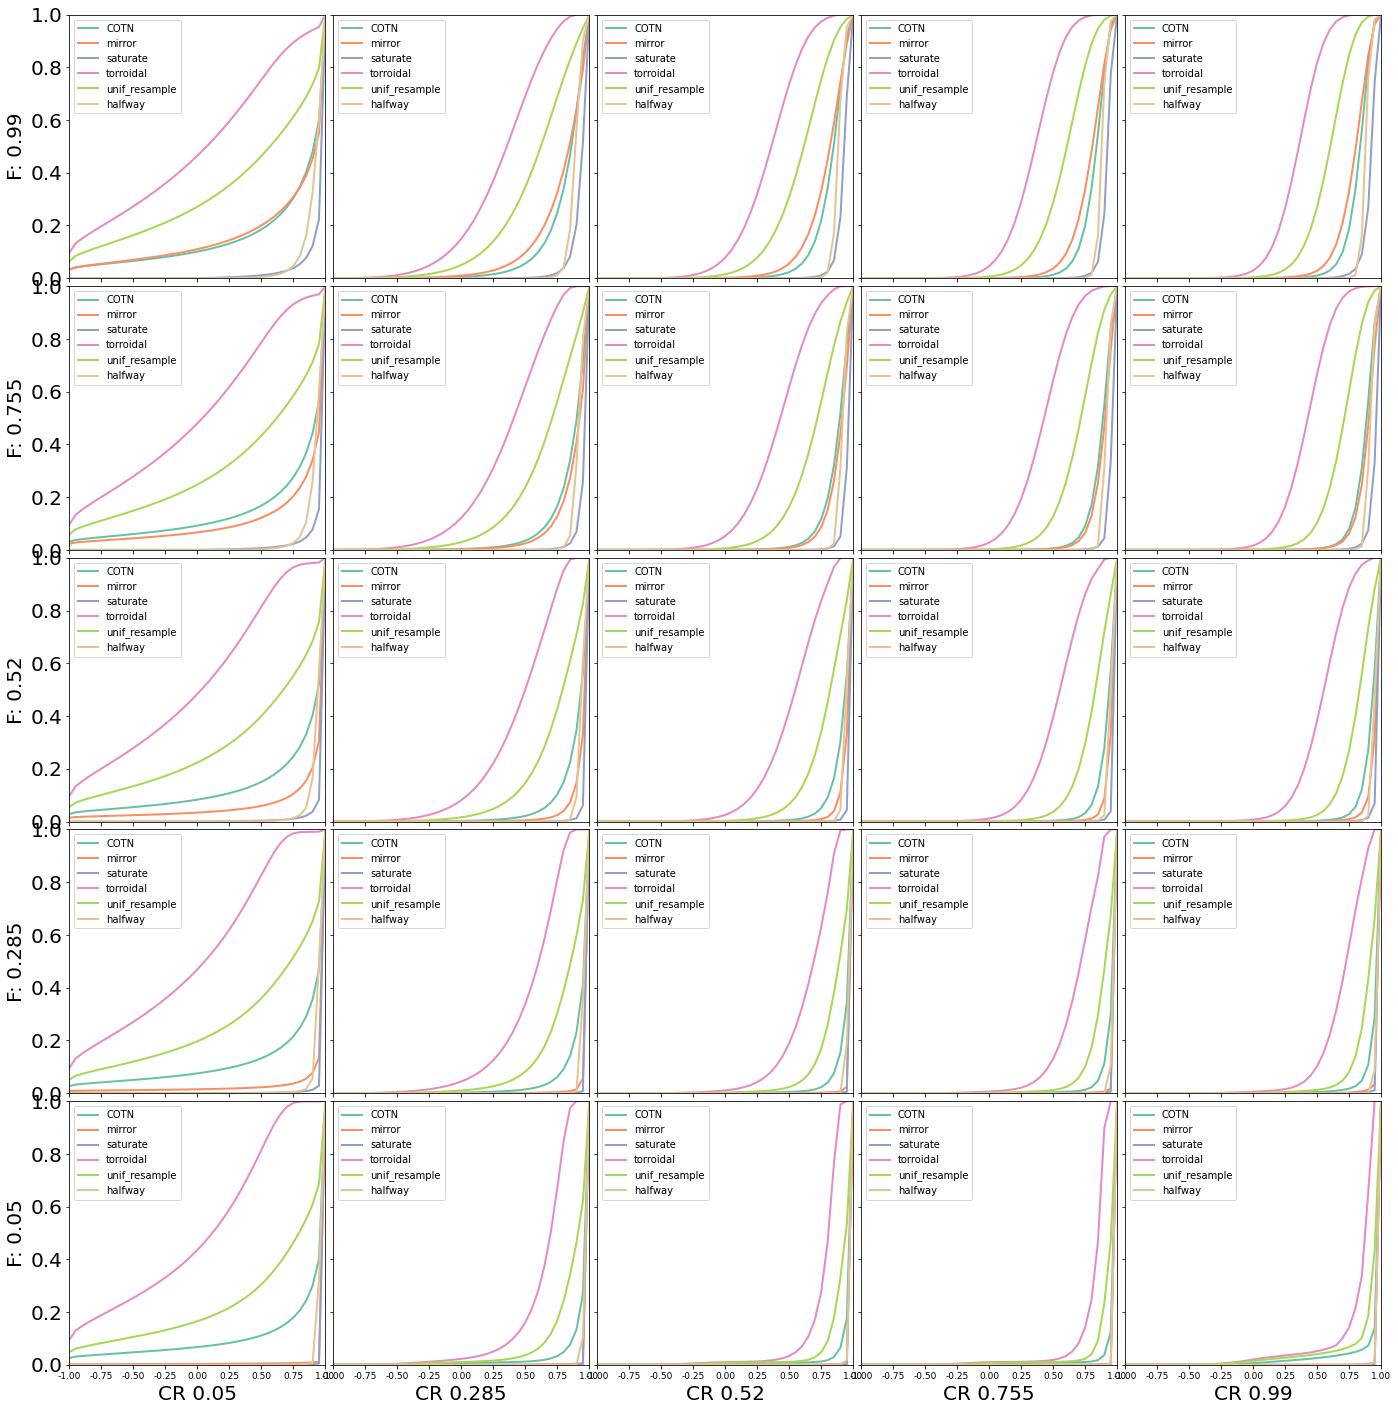

In [12]:
create_plot_matrix_ECDF_basic('b', 100)

In [ ]:
#population diversity plot
def plot_pop_div(F, CR, popsize):
    colors = sbs.color_palette('Set2', len(sdiss)+1)
    colors.pop(-2)
    plt.figure(figsize=(16,10))
    for sidx, sdis in enumerate(sdiss):
        add_legend = True
        dt = get_diversity_dt(sdis, F, CR, popsize)
        nr_runs = int(len(dt)/(300000/popsize))
        div1s = np.array(dt['div0']).reshape(nr_runs,-1)
        for idx in range(nr_runs):
            if add_legend:
                plt.plot(div1s[idx,:], color=colors[sidx], alpha=0.4, label = sdis)
                add_legend=False
            plt.plot(div1s[idx,:], color=colors[sidx], alpha=0.4)
    plt.yscale('log')
    plt.xscale('log')
    plt.grid()
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Diversity")
    plt.tight_layout()
    plt.savefig(f"Figures_div/DE_bin_F{F}_CR{CR}_p{popsize}_popdiv.pdf")

In [23]:
#Matrix plot of population diversity (figure 3 in paper)
def create_plot_matrix_diversity(popsize):
    colors = sbs.color_palette('Set2', len(sdiss)+1)
    colors.pop(-2)
    fig, axes = plt.subplots(nrows=5, ncols=10, sharex='all', sharey='all')
    bins = np.arange(-1.000000000,1.00000001,0.05)

    for idx_0, F in enumerate(['099','0755','052','0285','005']):
        for idx_1, CR in enumerate(['005', '00891', '01283', '01675', '02067', '02458', '0285', '052', '0755', '099']):
            for sidx, sdis in enumerate(sdiss):
                add_legend = True
                dt = get_diversity_dt(sdis, F, CR, popsize)
                nr_runs = int(len(dt)/(300000/popsize))
                div1s = np.array(dt['div0']).reshape(nr_runs,-1)
                for idx in range(nr_runs):
                    if add_legend:
                        axes[idx_0, idx_1].plot(div1s[idx,:], color=colors[sidx], alpha=0.4, label = sdis)
                        add_legend=False
                    axes[idx_0, idx_1].plot(div1s[idx,:], color=colors[sidx], alpha=0.4)
            axes[idx_0, idx_1].set_yscale('log')
            axes[idx_0, idx_1].set_xscale('log')
#             axes[idx_0, idx_1].grid()
            
#             for sdis in sdiss:
#                 dt = get_merged_dt_v2(cross, sdis, F, CR, popsize)
#                 dt_applied = dt[dt['applied'] >= 1]
#                 max_len = len(dt_applied)
#                 axes[idx_0, idx_1].plot([np.sum(dt_applied['cosine']<=b)/max_len for b in bins], label=f'SDIS: {sdis}', lw=2)
#             axes[idx_0, idx_1].legend(fontsize=10)
#             axes[idx_0, idx_1].set_ylim(0,1)
#             axes[idx_0, idx_1].set_xlim(0,40)


            if idx_0 == 4:
                axes[idx_0, idx_1].set_xlabel(f'0.{CR[1:]}')
#                 axes[idx_0, idx_1].set_xticks(range(len(bins))[::5])
#                 axes[idx_0, idx_1].set_xticklabels([f"{x:.2f}" for x in bins[::5]], fontsize=9)

        axes[idx_0, 0].set_ylabel(f'0.{F[1:]}')
#     fig.set_xlabel("CR")
#     fig.set_ylabel("F")
    fig.set_figheight(20)
    fig.set_figwidth(35)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.03, wspace=0.03)

    plt.savefig(f"Figures/Matrix_div_p{popsize}_V2.pdf")

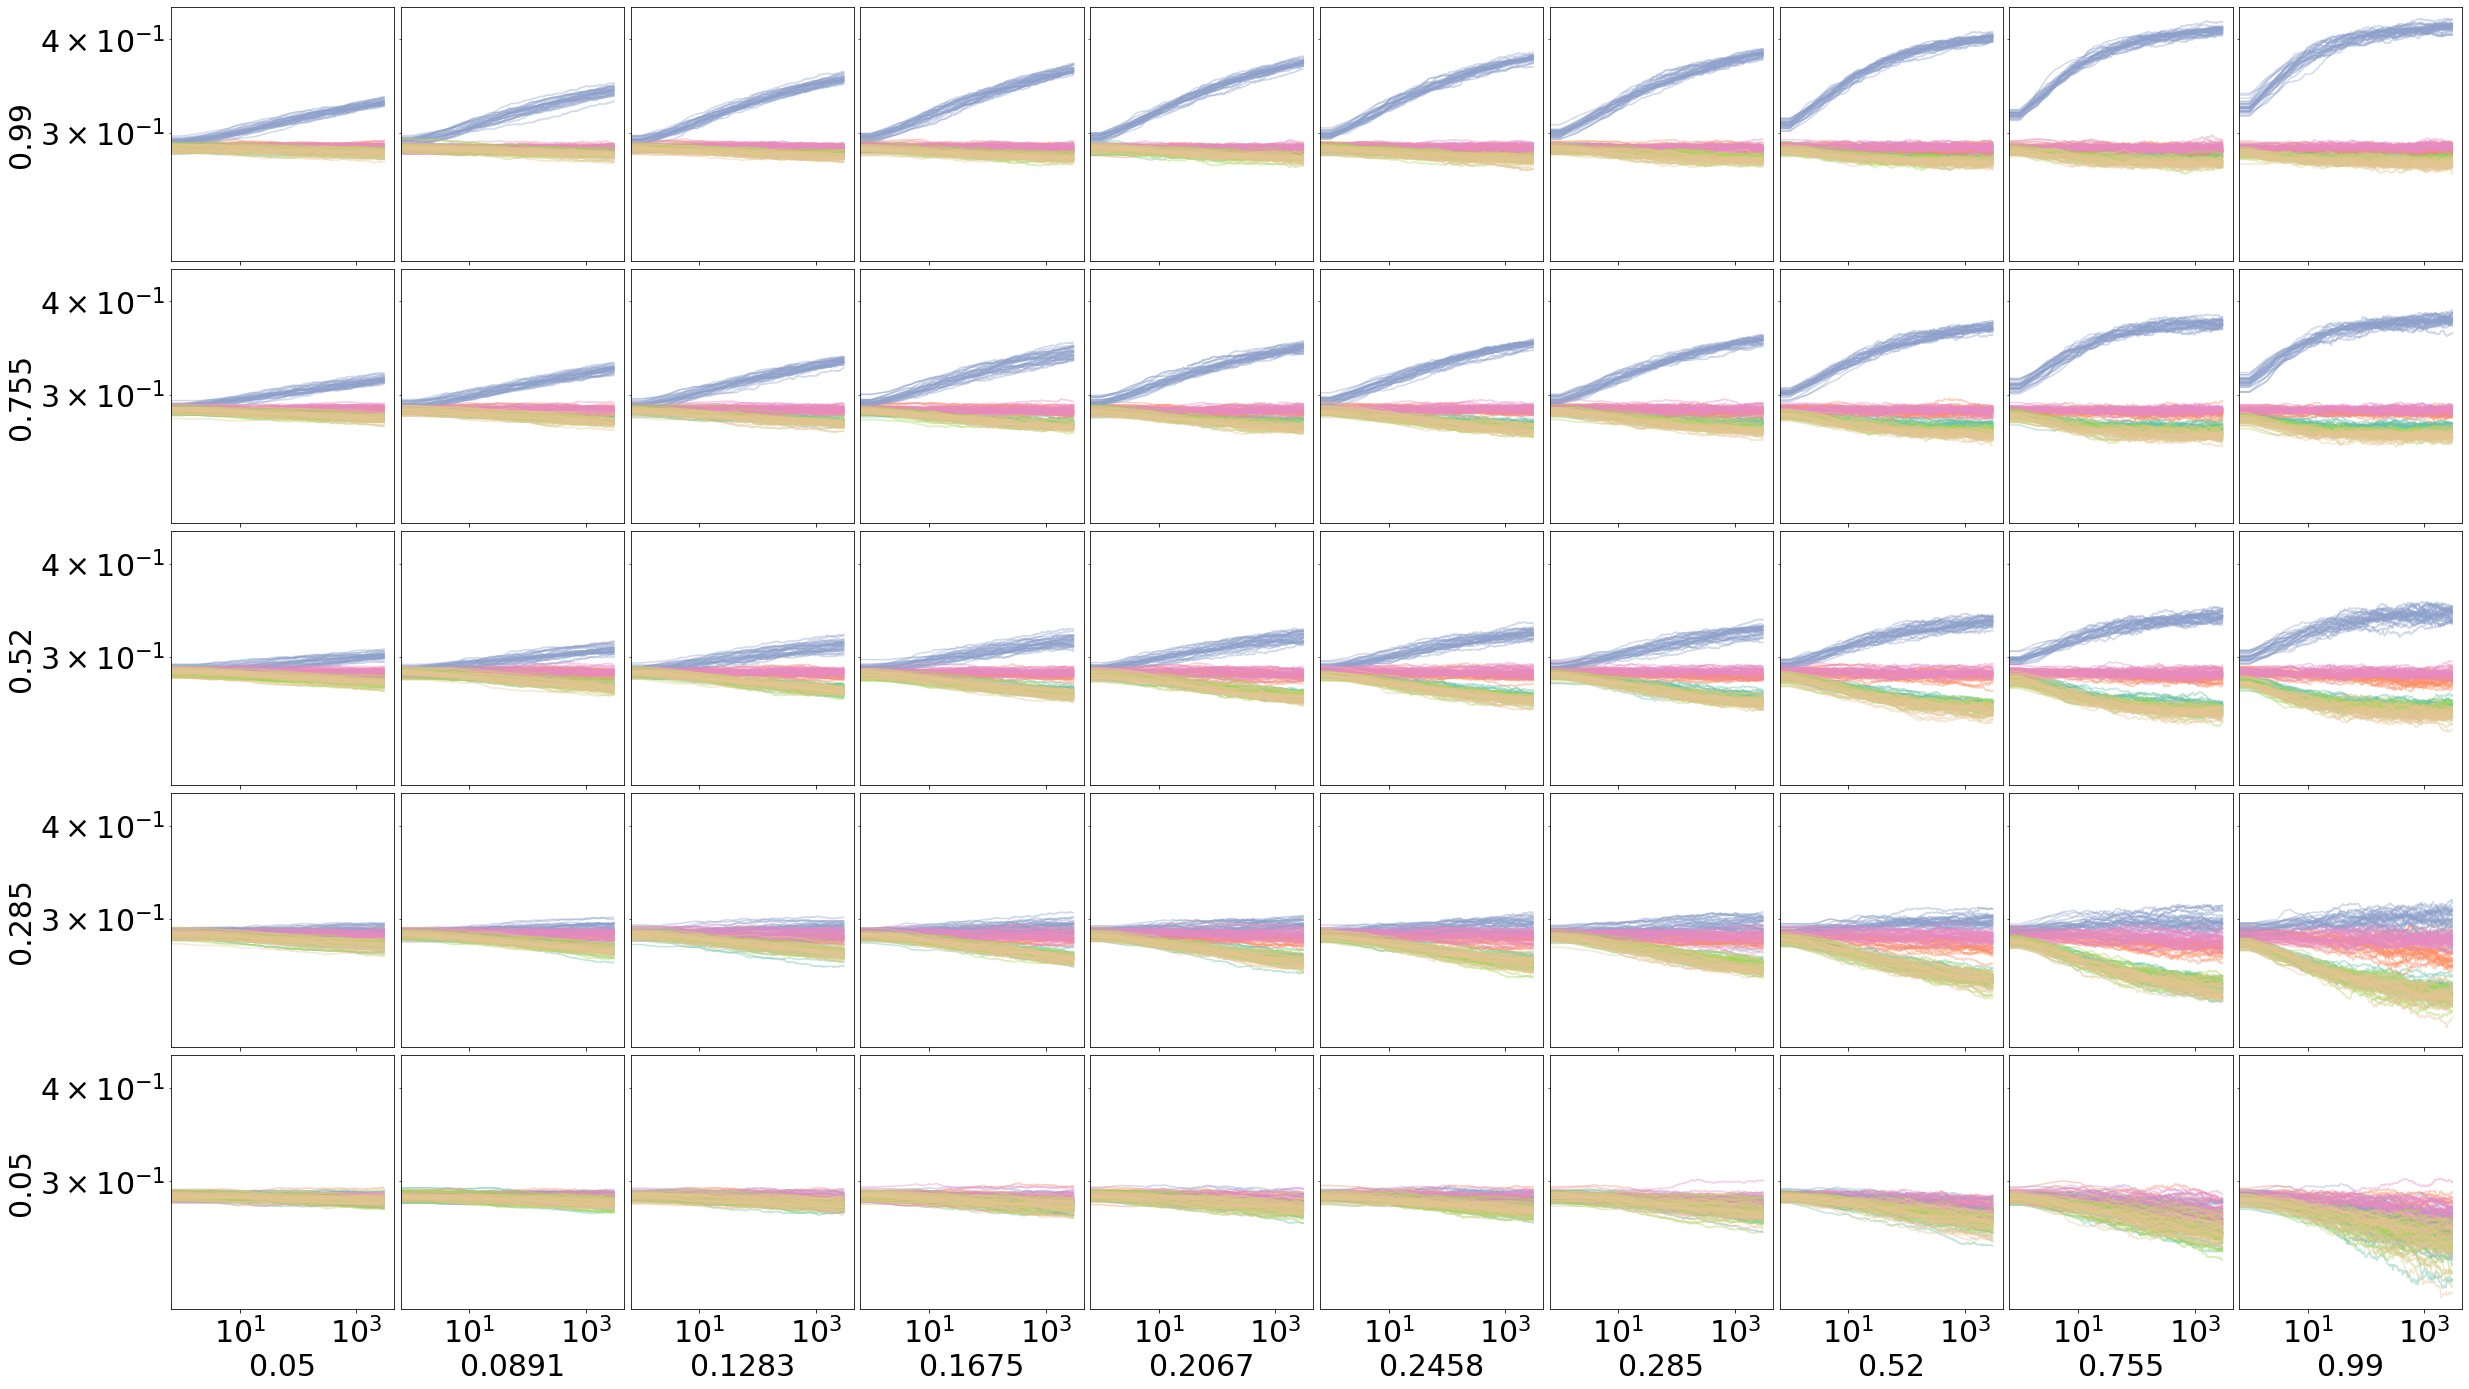

In [24]:
for psize in [100]:
    create_plot_matrix_diversity(psize)